# Tipos de Aprendizado

* Como o meu algoritmo de Machine Learning pode aprender?
    - Utiliza-se **dados** para criar **padrões** e formar modelos;
    - Precisamos do *input* (features X) para encontrar os *outputs* (targets y)
        - Se os dados já estão rotulados, isto é, para cada feature é dado um target inicilamente, é chamado de **aprendizado supervisionado**

* E se não possuirmos o valor do *target*?
    - É chamado de **aprendizado não supervisionado**
    - Os dados são classificados por características formando grupos (**clusters**)
        - é possível criar "classes" utilizando estes clusters e utilizar essas classes como target em outro contexto

    - **Clusterização**: agrupar dados semelhantes em um mesmo grupo (cluster) de forma a garantir que os dados do mesmo cluster sejam os mais próximos possíveis e dados de clusters diferentes sejam os mais diferentes (distantes) possíveis.

# K-means Clustering

* Em modelos de Machine Learning que envolvem classificação, normalmente é utilizado um vetor $y$ que contém os *target*, isto é, atribuindo classes distintas ao dataset. Mas aqui, no K-means Clustering, estes valores não é dado, portanto, o foco aqui é tentar classificar os dados sem estes valores.

1. Escolher $k$ pontos randomicamente (muitas vezes não é dado), onde $k$ é o número de clusters (conjuntos) para o dataset de entrada. Em muitos casos, como não temos os targets para visualizar como estão classificados os dados, o valor de $k$ não aparece tão fácil;

2. Escolher pontos aleatórios para ser os "centros" que classificam o dataset mais próximo de **cada centro**, formando diferentes clusters;

3. Dentro de cada cluster formado, podemos encontrar os **novos centros** baseado em cada feature (variável independente):
$$x_\ell^{cg} = \frac{\sum_i m_i x_\ell^i}{\sum_i m_i},$$
onde $m_i$ são as "massas" (weights) de cada ponto e $x_\ell^i$ são as features $x_\ell$, com $\ell$ features, atribuidas ao ponto $i$.
    - Muito semelhante com a ideia de **momento de inércia**

4. Trocar os **antigos centros** pelos **novos centros**;

5. Iterar até parar pelo critério escolhido, isto é, até otimizar a classificação e o centróide parar de mudar.

* Conforme aumenta-se o conjunto de features ($x_\ell$) diminui-se a similaridade entre os pontos, portanto, a qualidade de previsão diminui. 

* Queremos minimizar a soma das distância euclidiana dos dados a partir do centro do clusters a partir de uma função custo:
$$J = \sum_{j=1}^k \sum_{i=1}^N ||x_i^j - c_j||^2,$$
onde $k$ é o número de clusters e $N$ é o tamanho da amostra de dados, $x_i$ são os dados de treinamento, $c_j$ são os centros.

### Como escolhe $k$?

* Elbow Method
    - Gráfico de $J$ *versus* $k$
    - O valor de $k$ onde diminui drasticamente a variação de $J$ em relação a $k$ é o valor que otimiza a função

### Generate clustering data

In [17]:
import numpy as np
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from pandas import DataFrame

X_train, _ = make_blobs(n_samples=500, centers=3, n_features=2, random_state=50)

* Número de amostra = 500
* Número de clusters = 3
* Número de variáveis independentes = 2

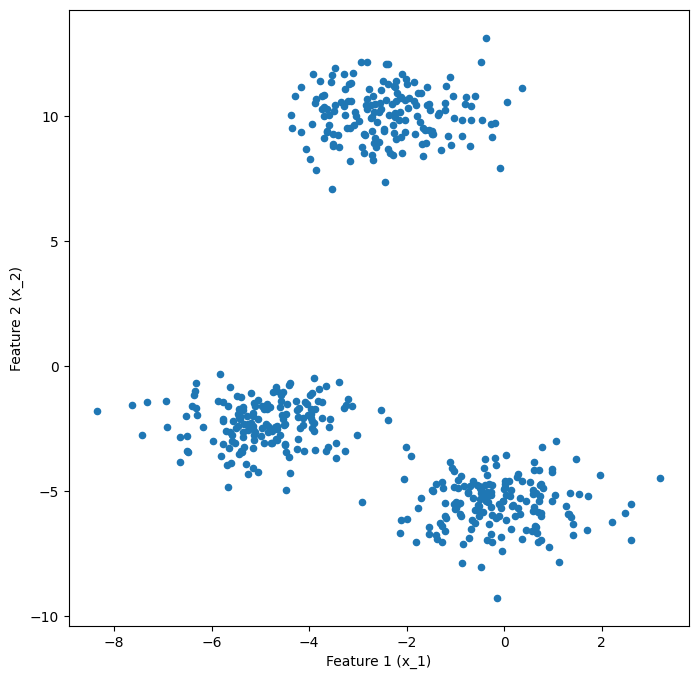

In [18]:
df = DataFrame(dict(x=X_train[:, 0], y=X_train[:, 1]))

fig, ax = plt.subplots(figsize=(8, 8))
df.plot(kind='scatter', x='x', y='y', ax=ax)
plt.xlabel('Feature 1 (x_1)')
plt.ylabel('Feature 2 (x_2)')
plt.show()

### Helper functions for K-means

In [19]:
def init_centroids(k, X):
    arr = []
    for i in range(k):
        cx1 = np.random.uniform(np.min(X[:, 0]), np.max(X[:, 0]))
        cx2 = np.random.uniform(np.min(X[:, 1]), np.max(X[:, 1]))
        arr.append([cx1, cx2])
    return np.array(arr)

In [20]:
def dist(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

In [21]:
def assign_clusters(k, X, cg):
    cluster = [-1]*len(X)
    for i in range(len(X)):
        dist_arr = []
        for j in range(k):
            dist_arr.append(dist(X[i], cg[j]))
        idx = np.argmin(dist_arr)
        cluster[i] = idx
    return np.array(cluster)

In [22]:
def compute_centroids(k, X, cluster):
    cg_arr = []
    for i in range(k):
        arr = []
        for j in range(len(X)):
            if cluster[j] == i:
                arr.append(X[j])
        cg_arr.append(np.mean(arr, axis=0))
    return np.array(cg_arr)

In [23]:
def measure_change(cg_prev, cg_new):
    res = 0
    for a,b in zip(cg_prev, cg_new):
        res += dist(a, b)
    return res

In [24]:
def show_clusters(X, cluster, cg):
    df = DataFrame(dict(x=X[:, 0], y=X[:, 1], label=cluster))
    colors = {0:'blue', 1:'orange', 2:'green'}
    fig, ax = plt.subplots(figsize=(8, 8))
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    ax.scatter(cg[:, 0], cg[:, 1], marker='*', s=150, c='#ff2222')
    plt.xlabel('Feature 1 (x_1)')
    plt.ylabel('Feature 2 (x_2)')
    plt.show()

### K-means

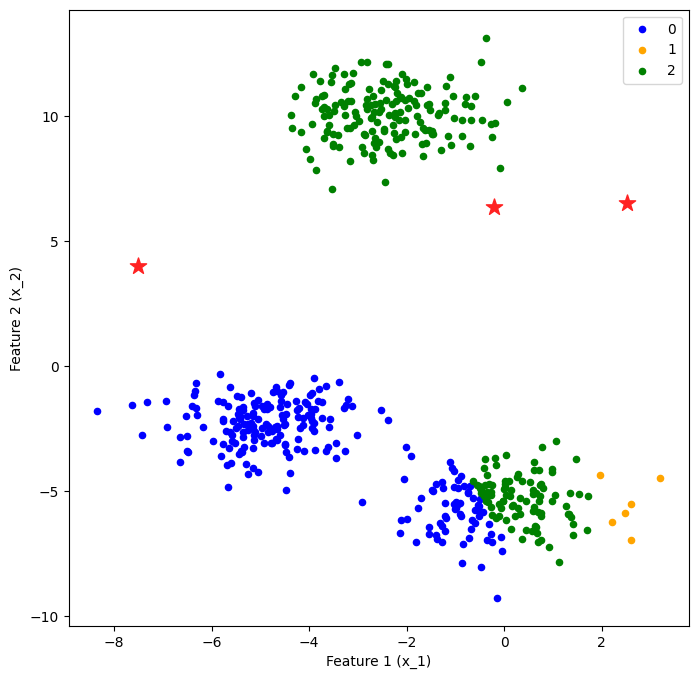

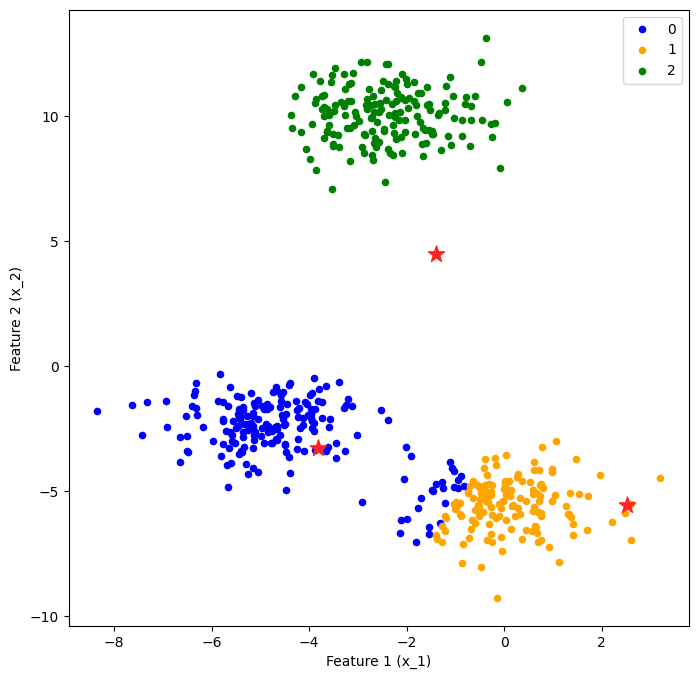

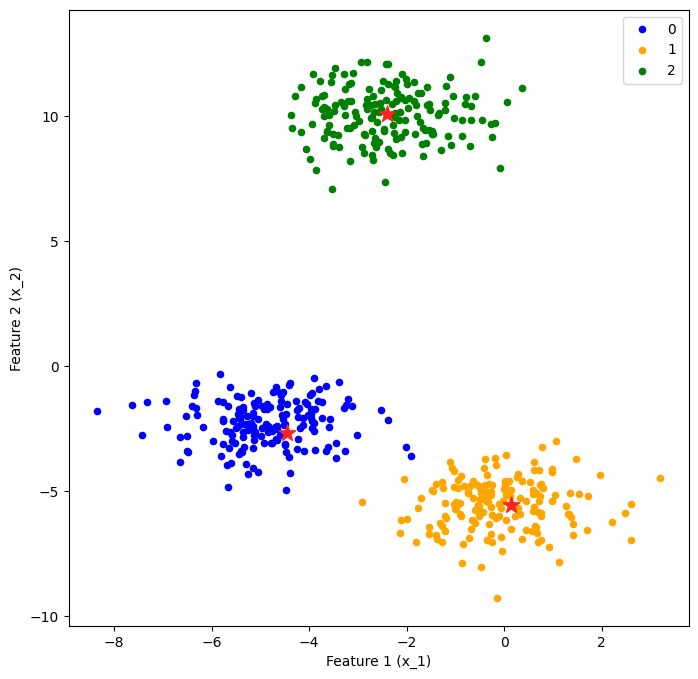

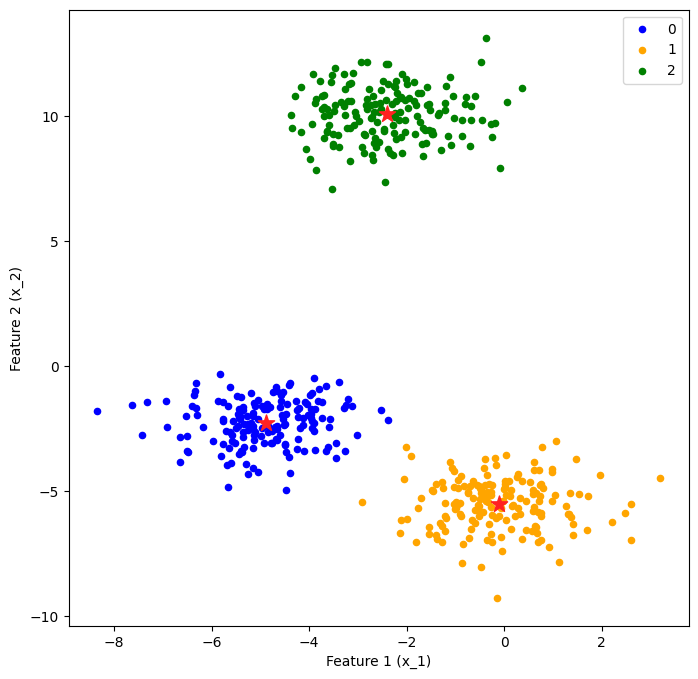

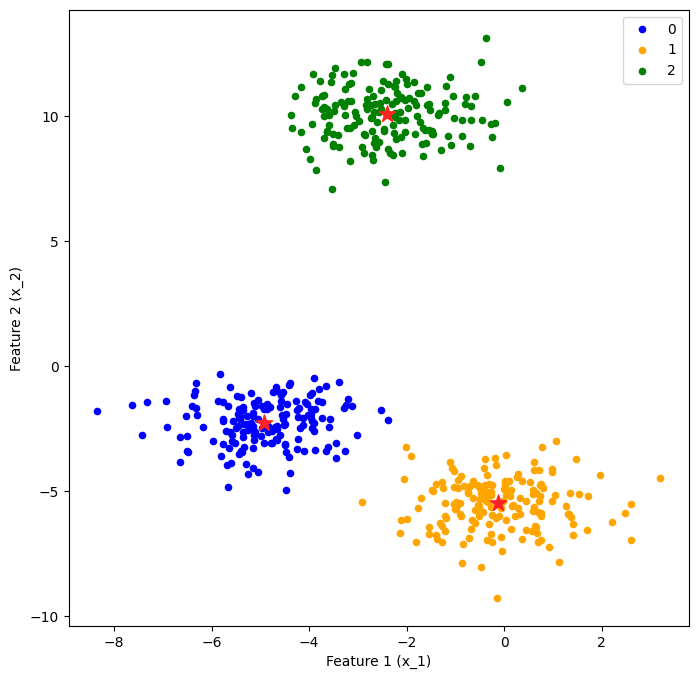

In [25]:
def k_means(k, X):
    cg_prev = init_centroids(k, X)
    cluster = [0]*len(X)
    cg_change = 100
    while cg_change > 0.001:
        cluster = assign_clusters(k, X, cg_prev)
        show_clusters(X, cluster, cg_prev)
        cg_new = compute_centroids(k, X, cluster)
        cg_change = measure_change(cg_prev, cg_new)
        cg_prev = cg_new
    return cluster

cluster = k_means(3, X_train)